In [1]:
# import process_data

In [2]:
import csv
import torch
from os.path import join

class Dataformatting(object):
    def __init__(self, path, filename, type):
        self.filepath = join(path, filename)
        self.type = type
        self.length = None
        self.seed = 21 

    def read_images_labels(self, filepath):
        labels = []
        images = []
        
        with open(filepath, "r") as f:
            file = csv.reader(f)
            header = next(file)
            
            for lines in file:
                lines = [float(item) for item in lines]
                labels.append(lines[0])
                image = torch.tensor(lines[1:])
                images.append(image.view(1,28,28))
        
        # print(len(labels), len(images))
        if len(labels) != len(images):
            raise ValueError('Mismatched number of labels and images')

        return images, labels

    def load_data(self):
        data, labels = self.read_images_labels(self.filepath)
        return data, labels

In [4]:
file_path = r'A:\Alsou Bek\Documents\programs\Clothing_Classification_model\data'
train_filename = 'fashion-mnist_train.csv'
test_filename = 'fashion-mnist_test.csv'

train_dataformat = Dataformatting(file_path, train_filename, 'train')
test_dataformat = Dataformatting(file_path, test_filename, 'test')
train_data, train_labels = train_dataformat.load_data()
test_data, test_labels = test_dataformat.load_data()


In [5]:
train_data = [x/255 for x in train_data]
test_data = [x/255 for x in test_data]

In [6]:
train_data[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902, 0.2000,
          0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000,

In [7]:
import process_to_dataset

In [8]:
dataset = process_to_dataset.MyDataset(train_data, train_labels)
test_dataset = process_to_dataset.MyDataset(test_data, test_labels)

In [9]:
dataset.__len__()

60000

In [10]:
from torch.utils.data import random_split

generator = torch.Generator().manual_seed(10)
train_dataset, val_dataset = random_split(dataset, [50000, 10000], generator=generator)

In [17]:
num_freq = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for (data, label) in train_dataset:
    num_freq[int(label)] = num_freq[int(label)] + 1

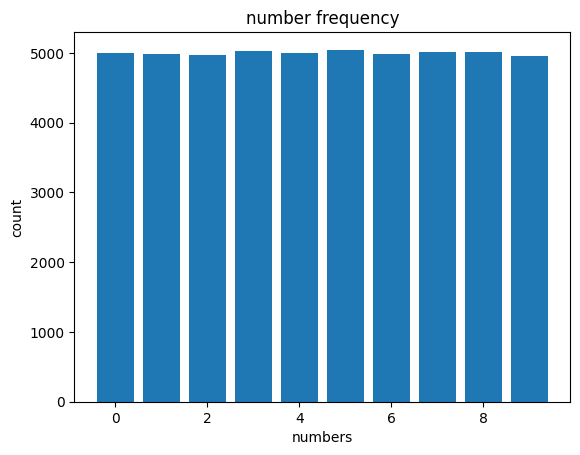

In [18]:
import matplotlib.pyplot as plt

plt.bar(num_freq.keys(), num_freq.values())
plt.title('number frequency')
plt.xlabel('numbers')
plt.ylabel('count')
plt.show()

In [19]:
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader

In [20]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [21]:
import models

In [22]:
net = models.ConvNN()

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001,momentum=0.9)

In [24]:
losses = []
validation_losses = []
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    avg_loss = 0
    validation_avg_loss = 0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        avg_loss += loss.item()

        # print statistics
        # running_loss += loss.item()
        # if (i+1) % 25 == 0:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 25:.3f}')
        #     running_loss = 0.0
            
    losses.append(avg_loss)

    with torch.no_grad():
        for i, data in enumerate(validation_dataloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            outputs = net(inputs)
            validation_loss = criterion(outputs, labels)

            validation_avg_loss += validation_loss.item()
            
    validation_losses.append(validation_avg_loss/(i+1))

print('Finished Training')

Finished Training


In [25]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [26]:
import matplotlib.pyplot as plt

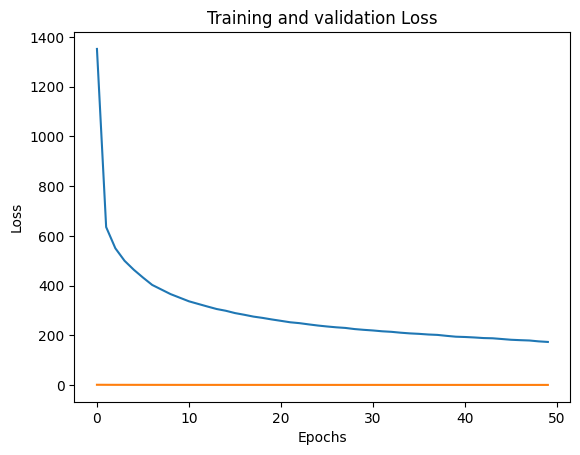

In [27]:
plt.plot(losses)
plt.plot(validation_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
# plt.yscale('log')
plt.show()

In [28]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

In [29]:
net = models.ConvNN()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [30]:
outputs = net(images)

In [31]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # print(outputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # break

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 89.32 %


In [32]:
print(predicted[0:10])
print(labels[0:10])

tensor([5, 0, 6, 6, 7, 9, 7, 9, 4, 8])
tensor([5, 0, 0, 6, 7, 9, 7, 9, 4, 8])


In [33]:
categories = {0: 'T-shirt/top',
            1: 'Trouser',
            2: 'Pullover',
            3: 'Dress',
            4: 'Coat',
            5: 'Sandal',
            6: 'Shirt',
            7: 'Sneaker',
            8: 'Bag',
            9: 'Ankle boot'}